##SALES PREDICTION USING PYTHON

Sales prediction is the process of forecasting future product sales based on various influencing factors. These factors may include advertising expenditure, customer segmentation, market trends, and the effectiveness of different advertising platforms. By leveraging data-driven techniques and machine learning models, businesses can make informed decisions to optimize marketing strategies, manage inventory, and maximize revenue.

#1. Importing the library files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# 2. Reading the Dataset

In [ ]:
data = pd.read_csv("/content/advertising.csv")

In [ ]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#First 5 rows of the dataset

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#Last 5 rows of the dataset

In [ ]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


#Thorough exploration of the dataset
Vewing the Columns in the dataset

In [ ]:
col = data.columns
print(col)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


#List of categorical features

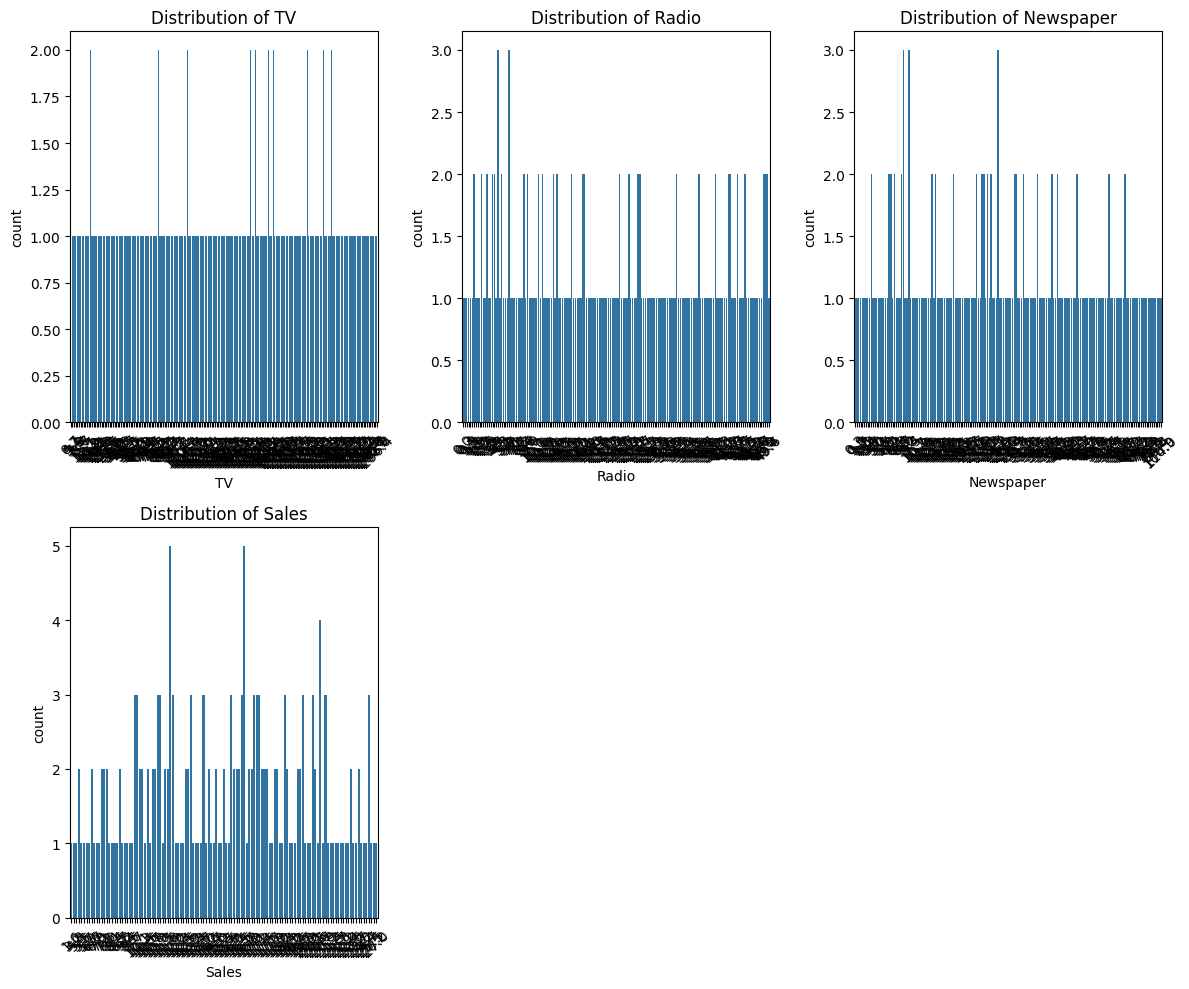

In [ ]:
categorical_features = ['TV', 'Radio', 'Newspaper', 'Sales']

plt.figure(figsize=(12, 10))
num_features = len(categorical_features)
rows = (num_features // 3) + (num_features % 3 > 0)

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Shape of the dataset


In [ ]:
print(data.shape)

(200, 4)


#3. Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Checking for missing data before preprocessing


In [ ]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


#Heatmap for Correlation:

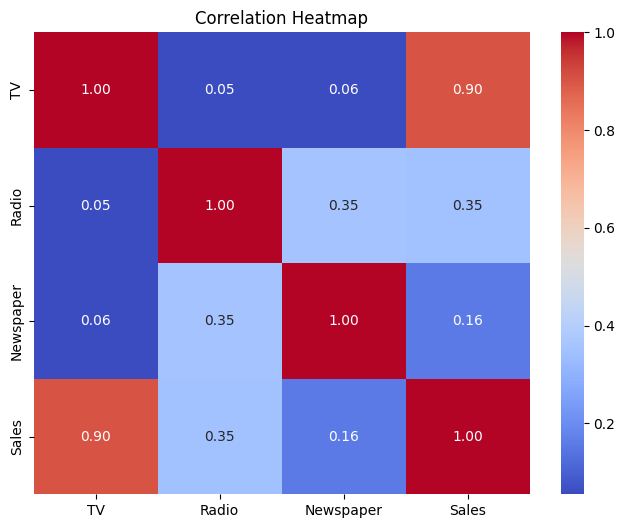

In [ ]:
plt.figure(figsize=(8,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Finding the Correlation between each feature

In [ ]:
corr = data.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Plot the distribution of the target variable

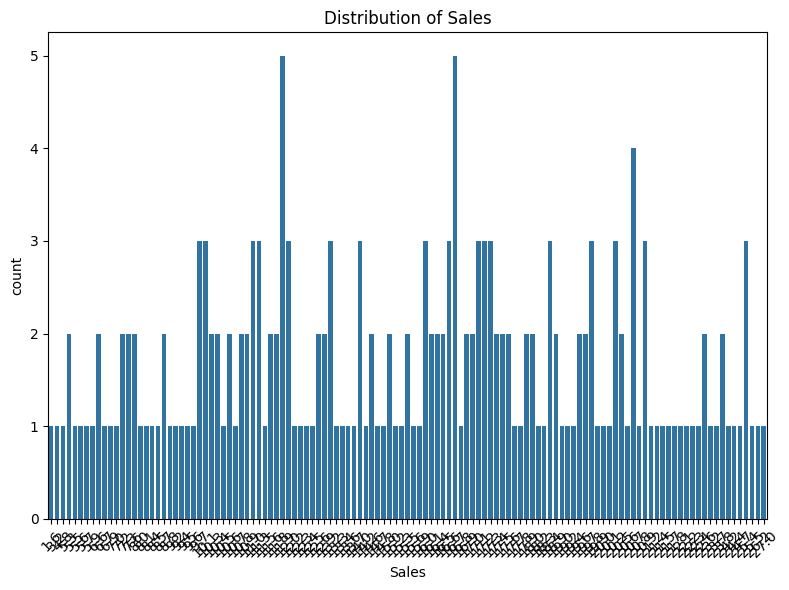

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sales', data=data)
plt.title('Distribution of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4. Splitting the data

In [ ]:
X = data.drop(columns=['Sales'])
y = data['Sales']


# Print the shapes of X and y to confirm the split

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (200, 3)
y shape: (200,)


In [ ]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


#Splitting into Training and Testing sets

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original class distribution in y_train:")
print(y_train.value_counts())

Original class distribution in y_train:
Sales
16.7    4
11.9    4
19.8    3
20.9    3
17.1    3
       ..
10.9    1
18.9    1
5.3     1
3.2     1
19.4    1
Name: count, Length: 101, dtype: int64


# Display the shapes of the resulting datasets

In [ ]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (160, 3)
Testing features shape: (40, 3)
Training labels shape: (160,)
Testing labels shape: (40,)


##5. Building The Models

# Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
y_test_binned_lr = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=5))
y_pred_binned_lr = np.digitize(y_pred_lr, bins=np.histogram_bin_edges(y_test, bins=5))
conf_matrix_lr = confusion_matrix(y_test_binned_lr, y_pred_binned_lr)
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")
print("Confusion Matrix:")
print(conf_matrix_lr)
print("=" * 50)

Linear Regression Performance:
MAE: 1.2748, MSE: 2.9078, R²: 0.9059
Confusion Matrix:
[[ 7  2  0  0  0  0]
 [ 1 10  0  0  0  0]
 [ 0  0  4  4  1  0]
 [ 0  0  0  2  2  0]
 [ 0  0  0  2  4  0]
 [ 0  0  0  0  1  0]]



# Scatter plot of actual vs predicted values

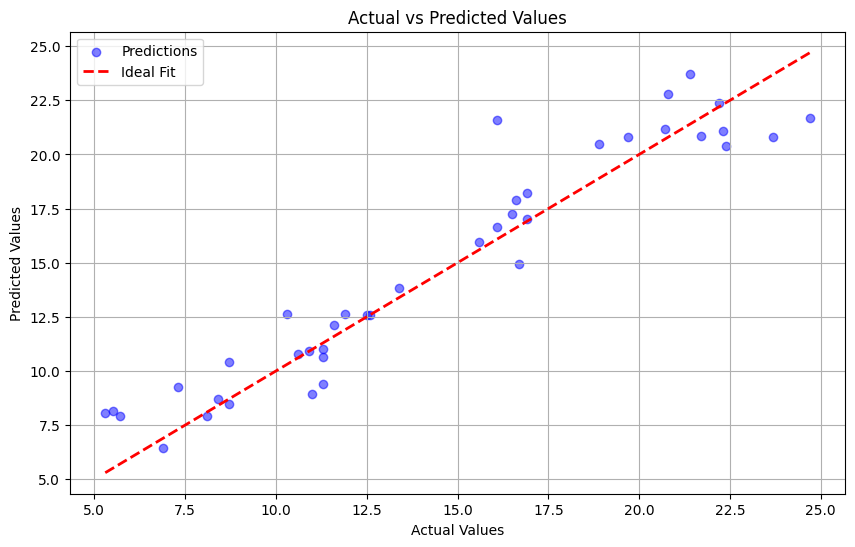

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label="Ideal Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


# Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=1234)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
y_test_binned_rf = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=5))
y_pred_binned_rf = np.digitize(y_pred_rf, bins=np.histogram_bin_edges(y_test, bins=5))
conf_matrix_rf = confusion_matrix(y_test_binned_rf, y_pred_binned_rf)
print("Random Forest Performance:")
print(f"MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("=" * 50)

Random Forest Performance:
MAE: 0.8742, MSE: 1.2875, R²: 0.9583
Confusion Matrix:
[[0 0 0 0 0 0 0]
 [2 3 4 0 0 0 0]
 [0 1 8 2 0 0 0]
 [0 0 1 4 4 0 0]
 [0 0 0 0 4 0 0]
 [0 0 0 0 1 5 0]
 [0 0 0 0 0 1 0]]



# Plot to visualize the effect

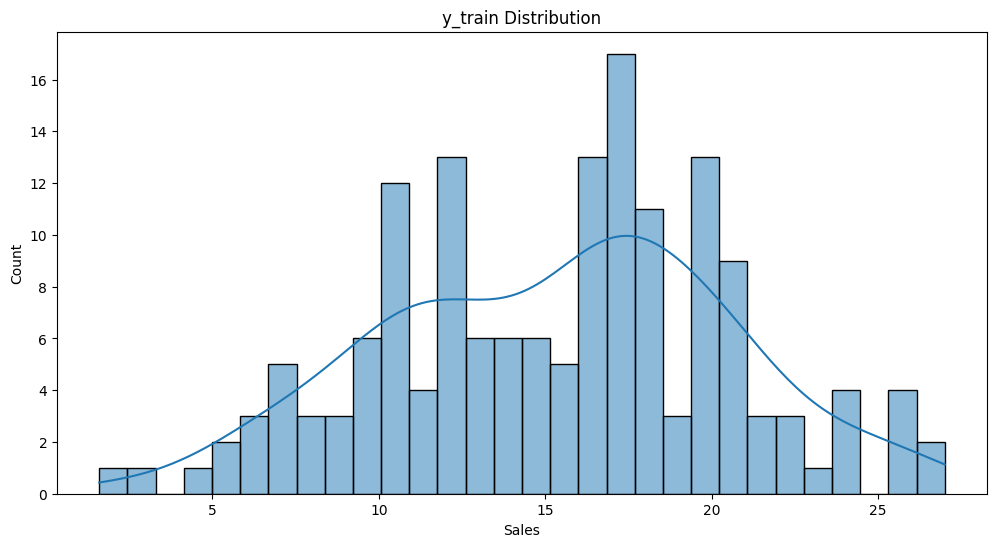

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(y_train, bins=30, kde=True)
plt.title('y_train Distribution')

plt.show()

# K-Nearest Neighbors

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
y_test_binned_knn = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=5))
y_pred_binned_knn = np.digitize(y_pred_knn, bins=np.histogram_bin_edges(y_test, bins=5))
conf_matrix_knn = confusion_matrix(y_test_binned_knn, y_pred_binned_knn)
print("K-Nearest Neighbors Performance:")
print(f"MAE: {mae_knn:.4f}, MSE: {mse_knn:.4f}, R²: {r2_knn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("=" * 50)

K-Nearest Neighbors Performance:
MAE: 1.3315, MSE: 3.1155, R²: 0.8992
Confusion Matrix:
[[ 6  3  0  0  0  0]
 [ 0 10  1  0  0  0]
 [ 0  1  1  7  0  0]
 [ 0  0  0  2  1  1]
 [ 0  0  0  1  5  0]
 [ 0  0  0  1  0  0]]


#Actual Vs Predicted

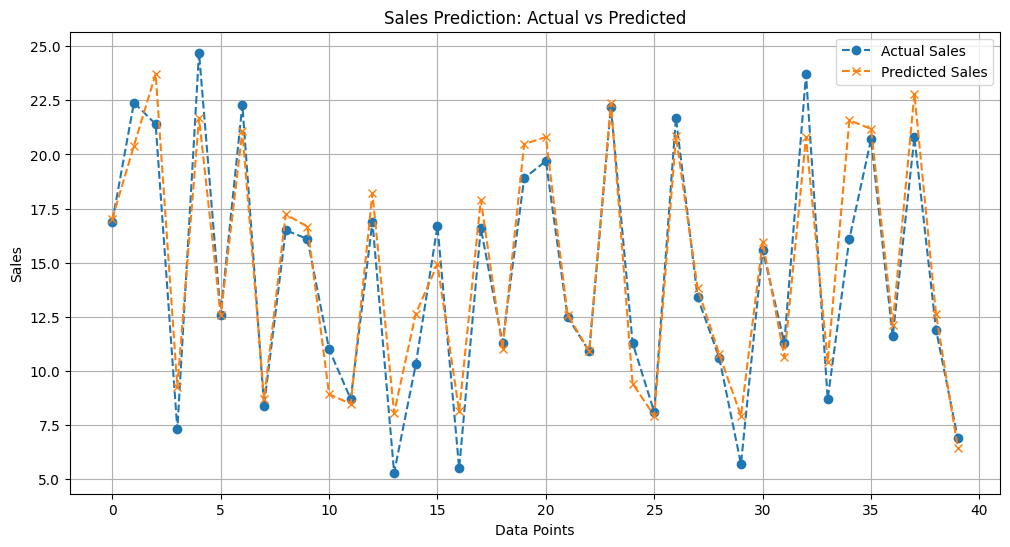

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales", marker='o', linestyle='dashed')
plt.plot(y_pred, label="Predicted Sales", marker='x', linestyle='dashed')
plt.xlabel("Data Points")
plt.ylabel("Sales")
plt.title("Sales Prediction: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


# Support Vector Machine

In [ ]:
svm = SVR(C=1, kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
y_test_binned_svm = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=5))
y_pred_binned_svm = np.digitize(y_pred_svm, bins=np.histogram_bin_edges(y_test, bins=5))
conf_matrix_svm = confusion_matrix(y_test_binned_svm, y_pred_binned_svm)
print("Support Vector Machine Performance:")
print(f"MAE: {mae_svm:.4f}, MSE: {mse_svm:.4f}, R²: {r2_svm:.4f}")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("=" * 50)

Support Vector Machine Performance:
MAE: 1.4836, MSE: 3.4991, R²: 0.8868
Confusion Matrix:
[[6 3 0 0 0 0]
 [1 8 2 0 0 0]
 [0 0 3 6 0 0]
 [0 0 0 3 1 0]
 [0 0 0 4 2 0]
 [0 0 0 1 0 0]]


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
dt = DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=1234)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
y_test_binned_dt = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=5))
y_pred_binned_dt = np.digitize(y_pred_dt, bins=np.histogram_bin_edges(y_test, bins=5))
conf_matrix_dt = confusion_matrix(y_test_binned_dt, y_pred_binned_dt)

print("Decision Tree Performance:")
print(f"MAE: {mae_dt:.4f}, MSE: {mse_dt:.4f}, R²: {r2_dt:.4f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("=" * 50)


Decision Tree Performance:
MAE: 1.1825, MSE: 2.7368, R²: 0.9114
Confusion Matrix:
[[0 0 0 0 0 0 0]
 [1 4 4 0 0 0 0]
 [1 0 7 3 0 0 0]
 [0 0 1 2 6 0 0]
 [0 0 0 0 2 2 0]
 [0 0 0 0 1 5 0]
 [0 0 0 0 0 1 0]]



# Making predictions and Evaluating the model

In [ ]:
y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")


Mean Absolute Error (MAE): 1.1825
Mean Squared Error (MSE): 2.7367500000000002
R-squared Score (R²): 0.9114351916274825


In [ ]:
# Train Decision Tree on Training Data
regressor_train = DecisionTreeRegressor(max_depth=3, random_state=1234)
regressor_train.fit(X_train, y_train)

# Train Decision Tree on Testing Data
regressor_test = DecisionTreeRegressor(max_depth=3, random_state=1234)
regressor_test.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=3, random_state=1234)

In [ ]:
### 3. Model Performance Metrics ###
# Predict
y_pred_train = regressor_train.predict(X_train)
y_pred_test = regressor_test.predict(X_test)
y_pred_overall = dt.predict(X)

# Evaluation Metrics
def evaluate_model(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{label} Performance:")
    print(f"  - Mean Absolute Error (MAE): {mae}")
    print(f"  - Mean Squared Error (MSE): {mse}")
    print(f"  - R-squared Score (R²): {r2}")

evaluate_model(y_train, y_pred_train, "Training Data")
evaluate_model(y_test, y_pred_test, "Testing Data")
evaluate_model(y, y_pred_overall, "Overall Data")


Training Data Performance:
  - Mean Absolute Error (MAE): 1.2677313609375964
  - Mean Squared Error (MSE): 2.537595583093309
  - R-squared Score (R²): 0.905311388042406

Testing Data Performance:
  - Mean Absolute Error (MAE): 0.7519047619047619
  - Mean Squared Error (MSE): 0.9187619047619048
  - R-squared Score (R²): 0.9702676634565791

Overall Data Performance:
  - Mean Absolute Error (MAE): 0.23650000000000002
  - Mean Squared Error (MSE): 0.54735
  - R-squared Score (R²): 0.980296919324254




###  Textual Representations and  Visual Representation ###


# Overall Model

In [ ]:
text_overall = export_text(regressor_all)
with open("decision_tree_regression_overall.log", "w") as fout:
    fout.write(text_overall)

print("Overall Data Decision Tree:\n", text_overall)

Overall Data Decision Tree:
 |--- feature_0 <= 3.09
|   |--- feature_0 <= 0.51
|   |   |--- feature_0 <= 0.23
|   |   |   |--- value: [0.08]
|   |   |--- feature_0 >  0.23
|   |   |   |--- value: [0.36]
|   |--- feature_0 >  0.51
|   |   |--- feature_0 <= 2.52
|   |   |   |--- value: [0.84]
|   |   |--- feature_0 >  2.52
|   |   |   |--- value: [0.29]
|--- feature_0 >  3.09
|   |--- feature_0 <= 3.97
|   |   |--- feature_0 <= 3.48
|   |   |   |--- value: [-0.13]
|   |   |--- feature_0 >  3.48
|   |   |   |--- value: [-0.55]
|   |--- feature_0 >  3.97
|   |   |--- feature_0 <= 4.58
|   |   |   |--- value: [-0.84]
|   |   |--- feature_0 >  4.58
|   |   |   |--- value: [-1.01]



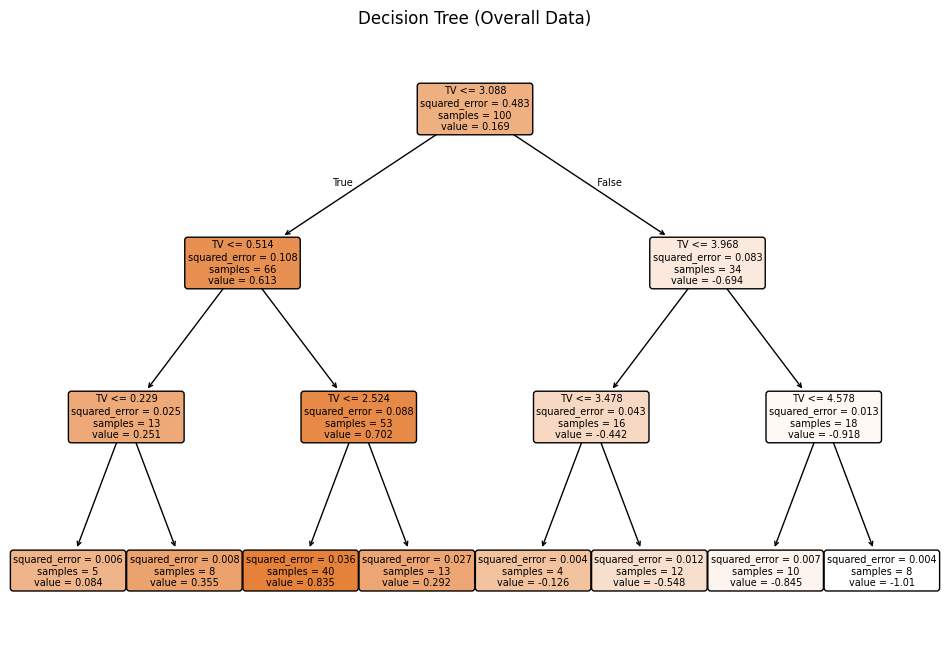

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(regressor_all, feature_names=['TV', 'Radio', 'Newspaper', 'Sales'], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (Overall Data)")
plt.savefig("decision_tree_overall.png")
plt.show()


# Train Model

In [ ]:
text_train = export_text(regressor_train)
with open("decision_tree_regression_train.log", "w") as fout:
    fout.write(text_train)

print("\nTraining Data Decision Tree:\n", text_train)


Training Data Decision Tree:
 |--- feature_0 <= 150.65
|   |--- feature_0 <= 38.85
|   |   |--- feature_2 <= 9.00
|   |   |   |--- value: [3.20]
|   |   |--- feature_2 >  9.00
|   |   |   |--- value: [7.76]
|   |--- feature_0 >  38.85
|   |   |--- feature_1 <= 26.75
|   |   |   |--- value: [11.61]
|   |   |--- feature_1 >  26.75
|   |   |   |--- value: [14.50]
|--- feature_0 >  150.65
|   |--- feature_1 <= 41.40
|   |   |--- feature_1 <= 10.05
|   |   |   |--- value: [17.12]
|   |   |--- feature_1 >  10.05
|   |   |   |--- value: [19.28]
|   |--- feature_1 >  41.40
|   |   |--- feature_0 <= 241.55
|   |   |   |--- value: [21.96]
|   |   |--- feature_0 >  241.55
|   |   |   |--- value: [25.59]



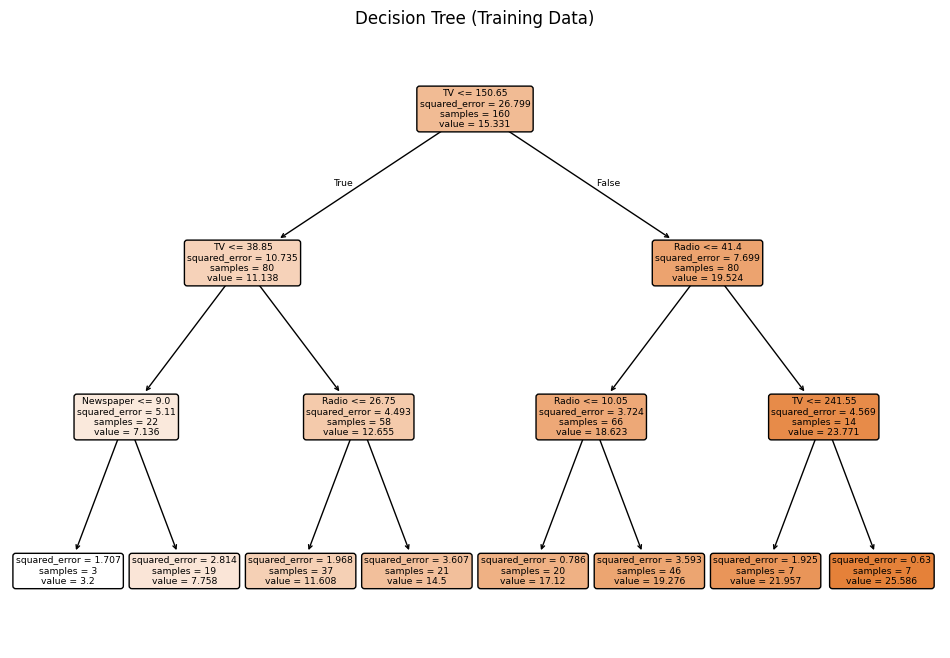

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(regressor_train, feature_names=['TV', 'Radio', 'Newspaper', 'Sales'], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (Training Data)")
plt.savefig("decision_tree_train.png")
plt.show()



# Test Model

In [ ]:
text_test = export_text(regressor_test)
with open("decision_tree_regression_test.log", "w") as fout:
    fout.write(text_test)

print("\nTesting Data Decision Tree:\n", text_test)


Testing Data Decision Tree:
 |--- feature_0 <= 151.40
|   |--- feature_0 <= 29.50
|   |   |--- feature_0 <= 10.05
|   |   |   |--- value: [5.50]
|   |   |--- feature_0 >  10.05
|   |   |   |--- value: [7.63]
|   |--- feature_0 >  29.50
|   |   |--- feature_1 <= 13.15
|   |   |   |--- value: [9.57]
|   |   |--- feature_1 >  13.15
|   |   |   |--- value: [11.83]
|--- feature_0 >  151.40
|   |--- feature_1 <= 27.90
|   |   |--- feature_1 <= 25.40
|   |   |   |--- value: [16.36]
|   |   |--- feature_1 >  25.40
|   |   |   |--- value: [18.90]
|   |--- feature_1 >  27.90
|   |   |--- feature_1 <= 35.40
|   |   |   |--- value: [19.90]
|   |   |--- feature_1 >  35.40
|   |   |   |--- value: [22.83]



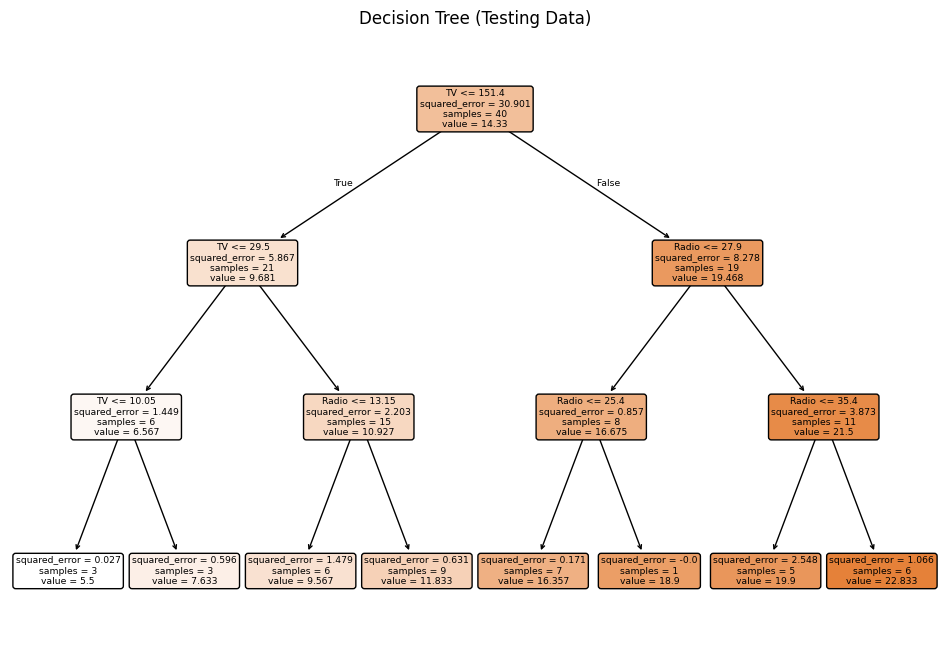

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(regressor_test, feature_names=['TV', 'Radio', 'Newspaper', 'Sales'], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (Testing Data)")
plt.savefig("decision_tree_test.png")
plt.show()

#============================  THE END   =============================